In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

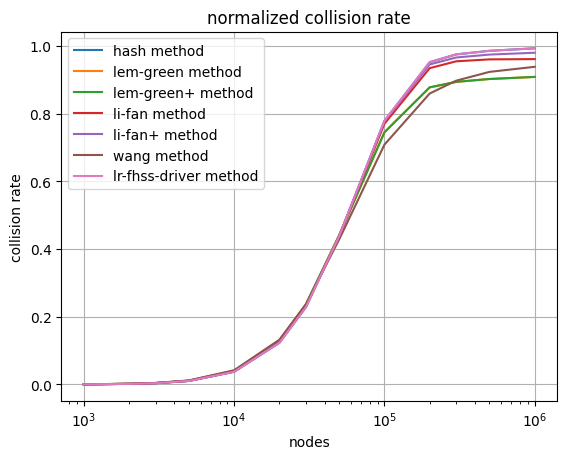

In [5]:
numOCW = 7
numOBW = 280
numGrids = 8
seq_length = 31
startLimit = 500
totalSlots = numOCW * numOBW * (startLimit + seq_length)

data = pd.read_csv('data.csv')
nodes = data['nodes'].to_numpy()
normColRate = data.iloc[:,1:].to_numpy() / totalSlots

for i, method in enumerate(data.keys()[1:]):
    plt.plot(nodes, normColRate[:,i], label=f'{method} method')

plt.title('normalized collision rate')
plt.xlabel('nodes')
plt.xscale('log')
plt.ylabel('collision rate')
plt.grid()
plt.legend()
plt.show()

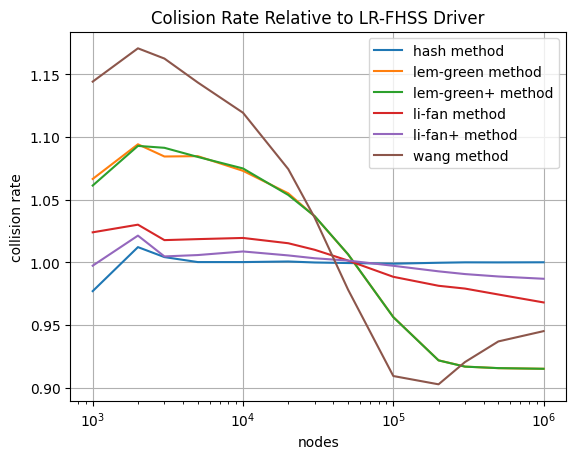

In [45]:
relColRate = data.iloc[:,1:].to_numpy()
for i in range(relColRate.shape[0]):
    relColRate[i] = relColRate[i] / relColRate[i, -1]

for i, method in enumerate(data.keys()[1:-1]):
    plt.plot(nodes, relColRate[:,i], label=f'{method} method')

plt.title('Colision Rate Relative to LR-FHSS Driver')
plt.xlabel('nodes')
plt.xscale('log')
plt.ylabel('collision rate')
plt.grid()
plt.legend()
plt.show()

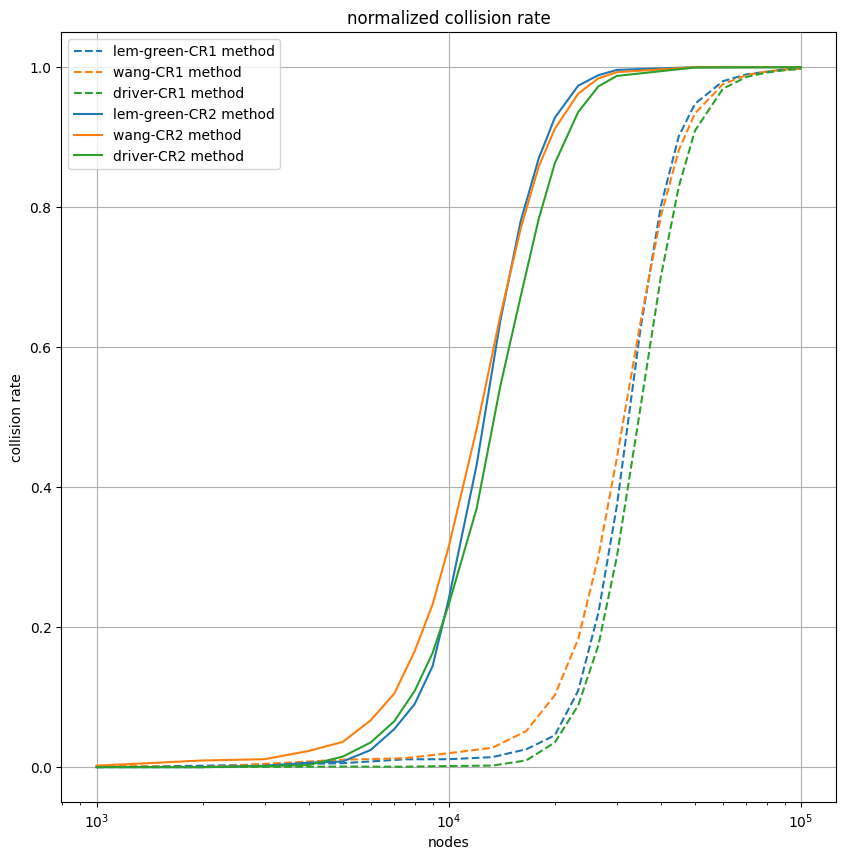

In [65]:
dataCR = pd.read_csv('dataCR.csv', index_col=0, header=None).T
nodesCR1 = dataCR['nodesCR1'].to_numpy()
nodesCR2 = dataCR['nodesCR2'].to_numpy()

plt.figure(figsize=(10,10))

plt.plot(nodesCR1, dataCR['lem-green-CR1'], label=f'lem-green-CR1 method', color='#1f77b4', linestyle='dashed')
plt.plot(nodesCR1, dataCR['wang-CR1'], label=f'wang-CR1 method', color='#ff7f0e', linestyle='dashed')
plt.plot(nodesCR1, dataCR['lr-fhss-driver-CR1'], label=f'driver-CR1 method', color='#2ca02c', linestyle='dashed')

plt.plot(nodesCR2, dataCR['lem-green-CR2'], label=f'lem-green-CR2 method', color='#1f77b4')
plt.plot(nodesCR2, dataCR['wang-CR2'], label=f'wang-CR2 method', color='#ff7f0e')
plt.plot(nodesCR2, dataCR['lr-fhss-driver-CR2'], label=f'driver-CR2 method', color='#2ca02c')

plt.title('normalized collision rate')
plt.xlabel('nodes')
plt.xscale('log')
plt.ylabel('collision rate')
#plt.xlim(8e3,5e4)
#plt.ylim(.2,.8)
plt.grid()
plt.legend()
plt.show()